# 1.- importar libreria

In [20]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pydotplus
import graphviz 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import tree


%matplotlib notebook

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'


# 2.- Cargar dataset

https://www.kaggle.com/uciml/glass


In [2]:
df = pd.read_csv('glass.csv', sep=',')

# 3.- Visualizar dataframer

In [3]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

# 4.- Preprocesamiento

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df['Type'].nunique()

6

In [7]:
x = df.iloc[:, :9].values
y = df.iloc[:,9].values # Vector de leabel

In [8]:
x = StandardScaler().fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# 5.- Dividir dataset entre training y testing set

Se selecciona aleatoriamente el 70% trainig y 30% testing (80, 30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
# probar el clasificador para ver que tambien y que tal mal esta funcionando

# 6.- Modelo arbol de decisiones

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train) # entrenar el arbol con datos de entrenamiento

# 7.- Predicción

In [11]:
y_pred = clf.predict(X_test) # predicción con el arbol entrenado

# 8.- Cáculo accuacy

In [12]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred)*100,'%')
# comprar los label vs el modelo
# predecir el 60% de nuestro datos en el modelo

Accuracy:  63.07692307692307 %


# 9.- Visualización árbol

In [13]:
fn = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
cn = ['buildingwindowsfloatprocessed','buildingwindowsnonfloatprocessed',
      'vehiclewindowsfloatprocessed','containers','tableware','headlamps']
cn


['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

<IPython.core.display.Javascript object>


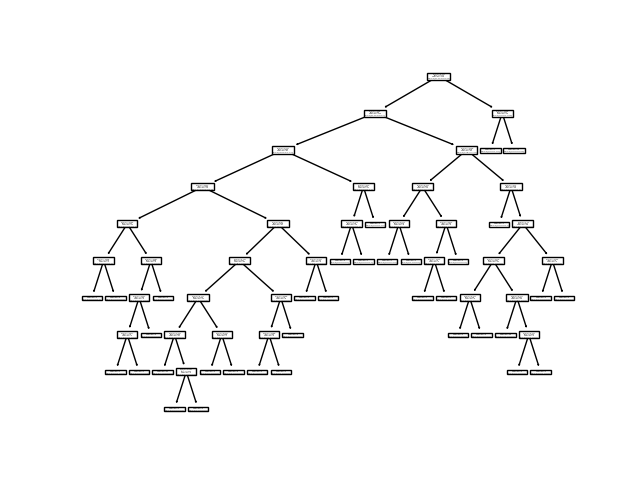

[Text(358.5297619047619, 351.11999999999995, 'X[7] <= 0.292\ngini = 0.714\nsamples = 149\nvalue = [51, 57, 8, 9, 6, 18]'),
 Text(294.86904761904765, 314.15999999999997, 'X[3] <= -0.05\ngini = 0.66\nsamples = 133\nvalue = [51, 57, 8, 8, 6, 3]'),
 Text(202.97619047619048, 277.2, 'X[6] <= 1.034\ngini = 0.555\nsamples = 81\nvalue = [49, 22, 5, 1, 2, 2]'),
 Text(122.52380952380953, 240.23999999999998, 'X[0] <= -0.467\ngini = 0.469\nsamples = 70\nvalue = [49, 13, 5, 0, 1, 2]'),
 Text(47.23809523809524, 203.28, 'X[0] <= -0.782\ngini = 0.734\nsamples = 13\nvalue = [3, 3, 5, 0, 1, 1]'),
 Text(23.61904761904762, 166.32, 'X[3] <= -1.435\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 0, 0, 1, 0]'),
 Text(11.80952380952381, 129.36, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(35.42857142857143, 129.36, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0]'),
 Text(70.85714285714286, 166.32, 'X[3] <= -0.351\ngini = 0.568\nsamples = 9\nvalue = [0, 3, 5, 0, 0, 1]'),
 Text(59.04761904761905

In [14]:
tree.plot_tree(clf) 

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data)  

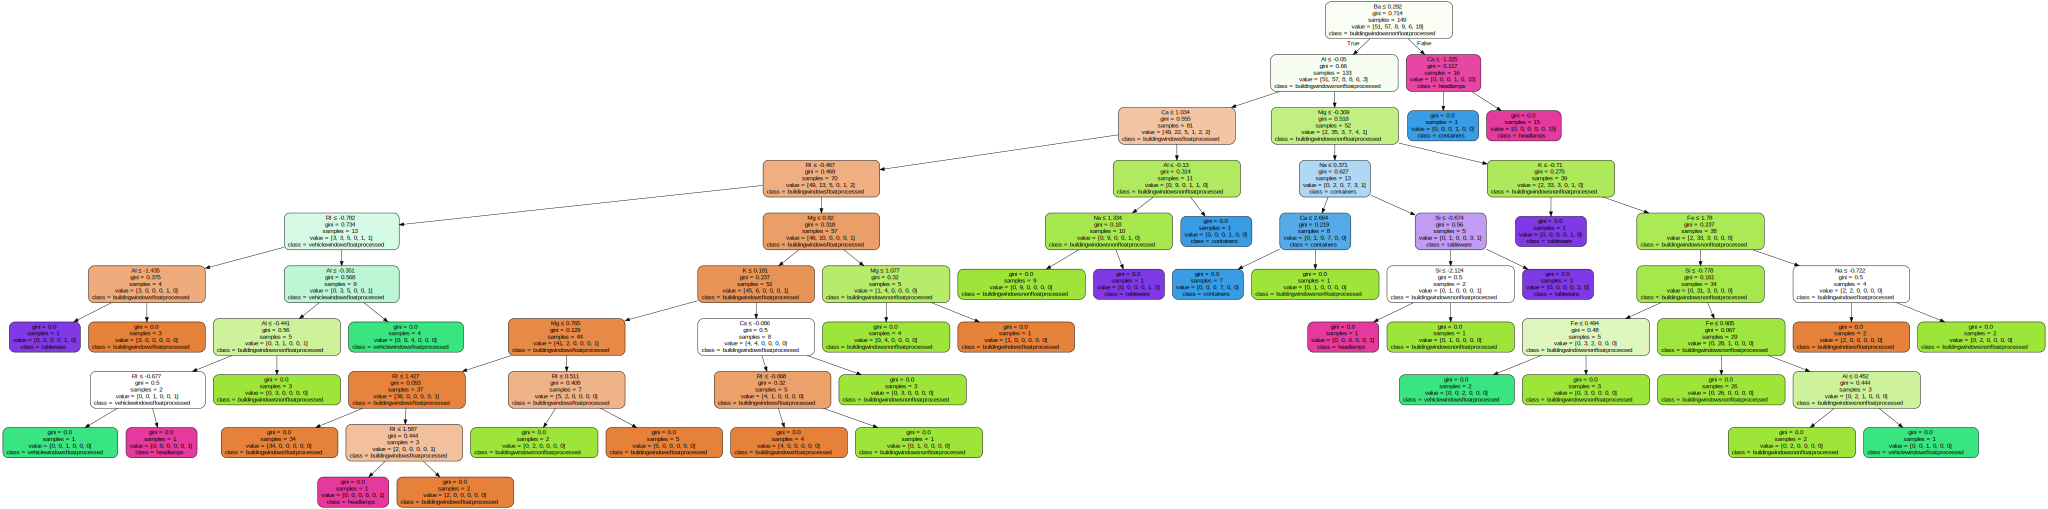

In [22]:
graph